#  Q1 (50_Startups)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import pylab          
import scipy.stats as st

In [2]:
star=pd.read_csv('50_Startups.csv')
star

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
star.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
stars=star.rename(columns={'R&D Spend':'rds','Administration':'admin','Marketing Spend':'mark',})
stars

,rds,admin,mark,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
stars.corr()

,rds,admin,mark,Profit
rds,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
mark,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
stars[stars.duplicated()]

,rds,admin,mark,State,Profit


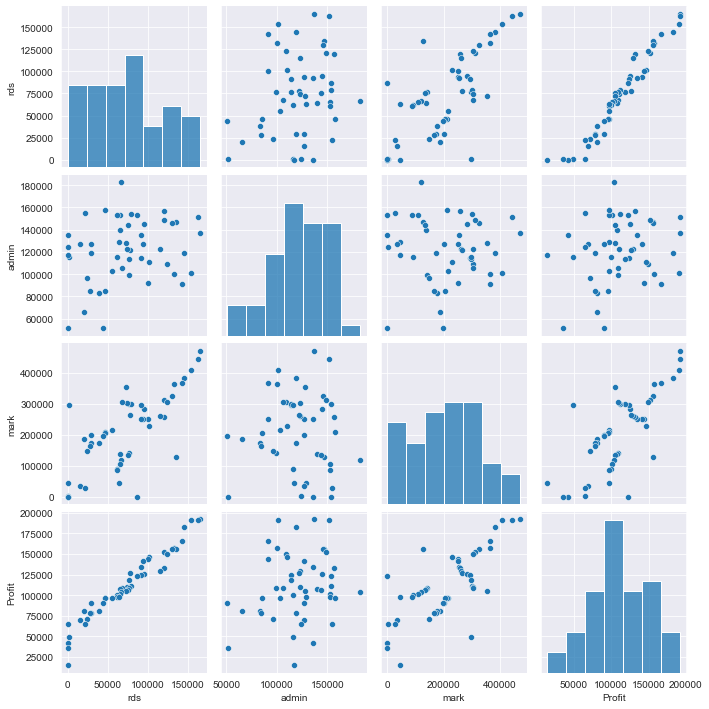

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(stars)

In [9]:
model=smf.ols("Profit~rds+admin+mark",data=stars).fit()
model

In [10]:
model.params

Intercept    50122.192990
rds              0.805715
admin           -0.026816
mark             0.027228
dtype: float64

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           4.53e-30
Time:                        17:10:54   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rds            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
mark           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# model accuracy is 94.75%
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [13]:
# admin has in-significant pvalue
slr_a=smf.ols("Profit~admin",data=stars).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    3.040044
 admin        1.419493
 dtype: float64,
 Intercept    0.003824
 admin        0.162217
 dtype: float64)

In [14]:
slr_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 18 Dec 2021   Prob (F-statistic):              0.162
Time:                        17:10:54   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# mark has significant pvalue
slr_m=smf.ols("Profit~mark",data=stars).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept    7.808356
 mark         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 mark         4.381073e-10
 dtype: float64)

In [16]:
slr_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           4.38e-10
Time:                        17:10:54   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
mark           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# varaibles have significant pvalues
mlr_am=smf.ols("Profit~admin+mark",data=stars).fit()
mlr_am.tvalues,mlr_am.pvalues

(Intercept    1.142741
 admin        2.467779
 mark         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 admin        1.729198e-02
 mark         9.727245e-11
 dtype: float64)

In [18]:
# collinearity check
# calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_r=smf.ols("rds~admin+mark",data=stars).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("admin~rds+mark",data=stars).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("mark~admin+rds",data=stars).fit().rsquared
vif_m=1/(1-rsq_m)

# putting the values in Dataframe format
stars1={'Variables':['rds','admin','mark'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(stars1)
Vif_df


,Variables,Vif
0,rds,2.468903
1,admin,1.175091
2,mark,2.326773


None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

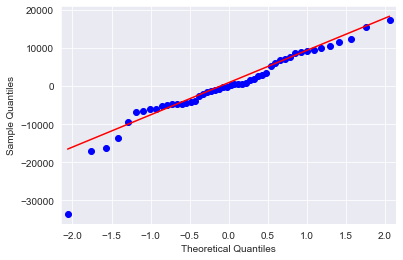

In [19]:
# residual analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q')
plt.show()

In [20]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [21]:
# test for homoscedasticity or heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
# user defined z = (x - mu)/sigma
def standard_values(vals) : return (vals-vals.mean())/vals.std()

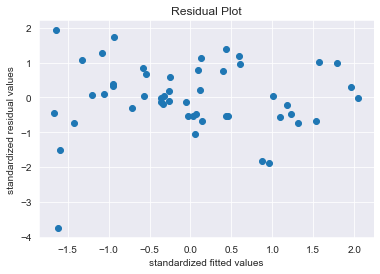

In [22]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [23]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)
# exog = x-variable & endog = y-variable

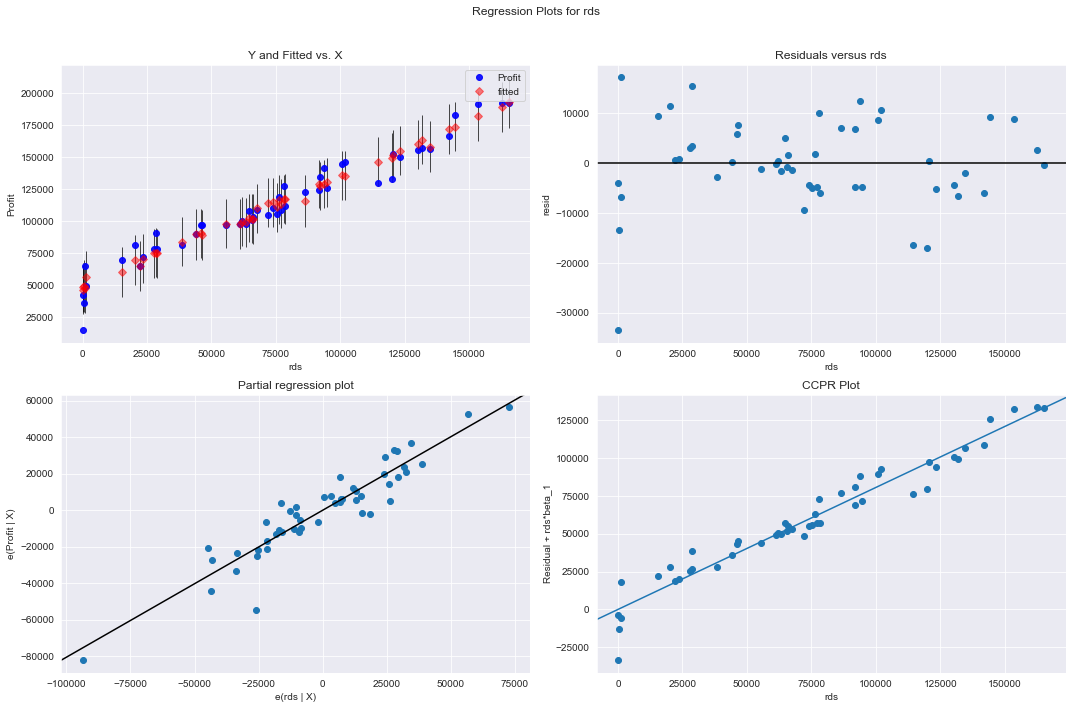

In [24]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'rds',fig=fig)
plt.show()

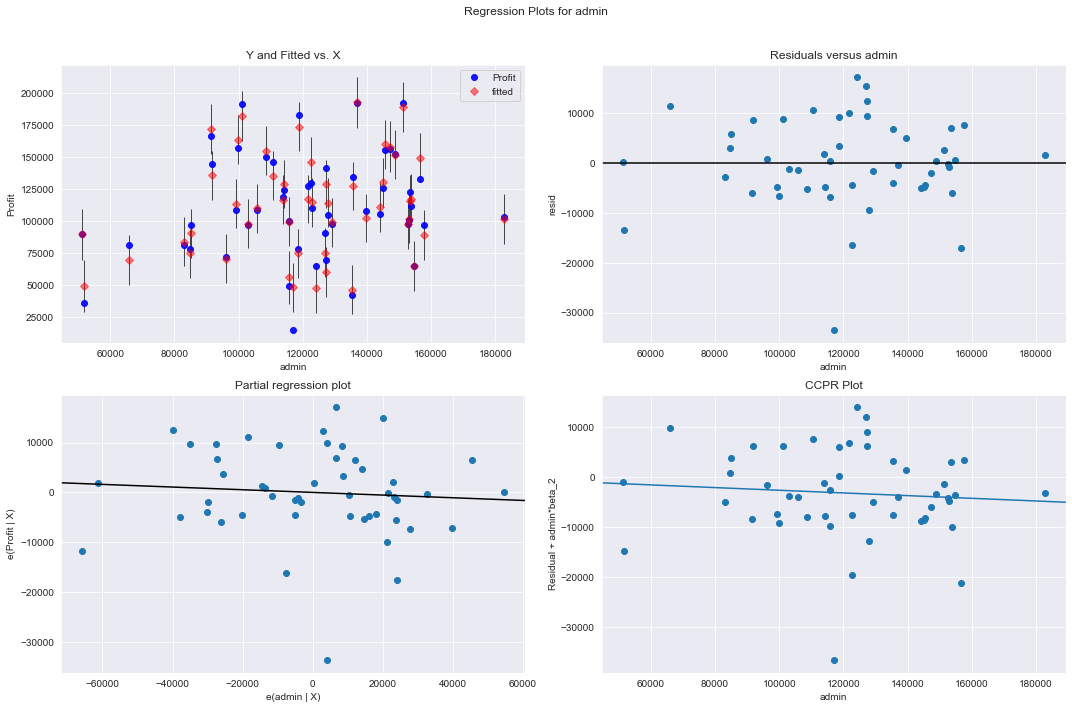

In [25]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'admin',fig=fig)
plt.show()

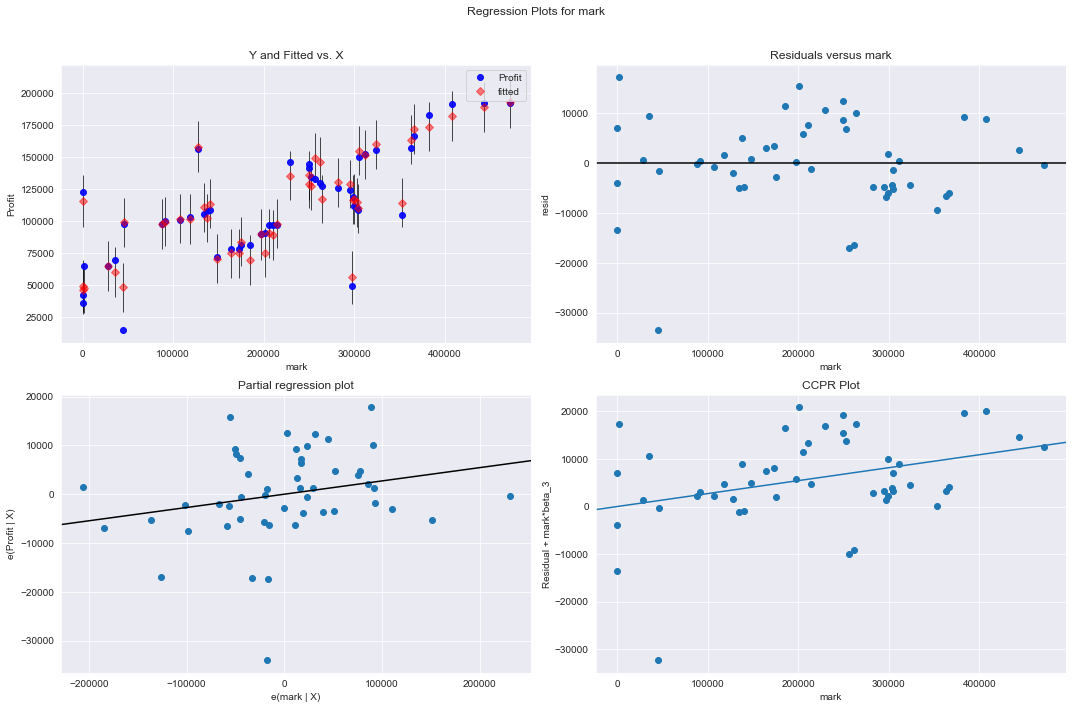

In [26]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'mark',fig=fig)
plt.show()

Model Deletion Diagnostics (checking Outliers or Influencers)

Two Techniques : 1. Cook's Distance & 2. Leverage value

In [27]:
# cook's Distance : if cook's distance > 1, then it's an outlier
# get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

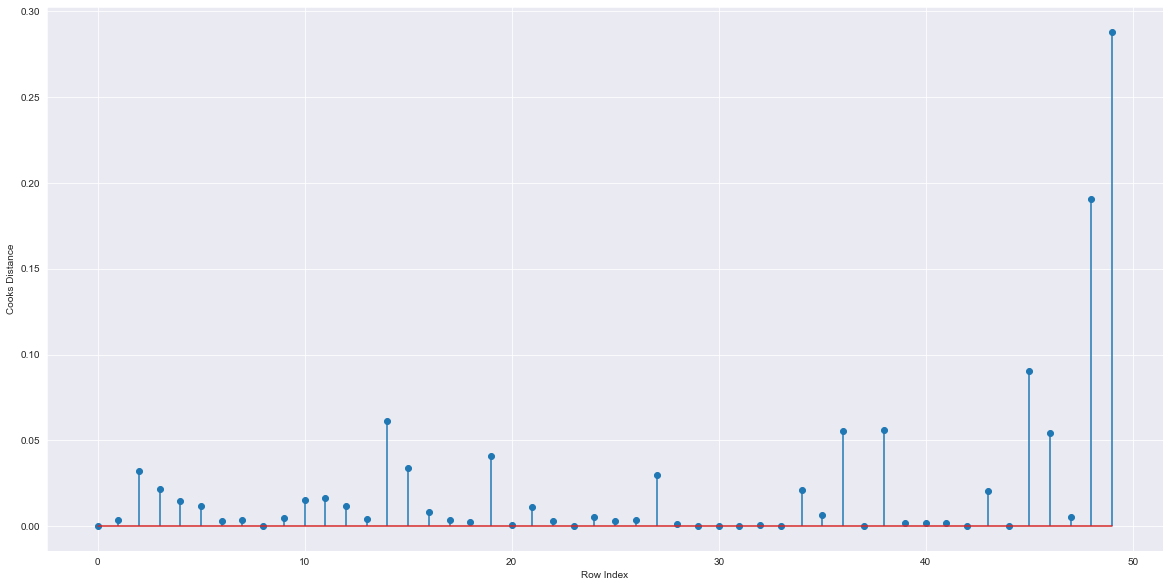

In [28]:
# plot the influencers using the stem plot
fig=plt.figure(figsize=(20,10))
plt.stem(np.arange(len(stars)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
# index and value of influencer where C>0.5
np.argmax(c),np.max(c)

(49, 0.2880822927543263)

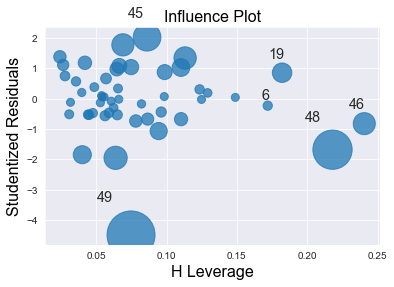

In [30]:
# leverage value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [31]:
# leverage cuttoff value = 3*(k+1)/n 
# (k = no.of features/columns & n = no. of datapoints)
k=stars.shape[1]
n=stars.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [32]:
stars[stars.index.isin([49])]

,rds,admin,mark,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [33]:
# discard the data points which are influencers and reassign the row number (reset_index(drop=True))
stars1=stars.drop(stars.index[[49]],axis=0).reset_index(drop=True)
stars1

,rds,admin,mark,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
# model deletion diagnostics and final model
while np.max(c)>0.5 :
    model=smf.ols("Profit~rds+admin+mark",data=stars1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    stars1=stars1.drop(stars1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    stars1
else:
    final_model=smf.ols("Profit~rds+admin+mark",data=stars1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [35]:
final_model.rsquared

0.9613162435129847

In [36]:
stars1

,rds,admin,mark,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
# say new data for prediction is
new_star=pd.DataFrame({'rds':70000,"admin":90000,"mark":140000},index=[0])
new_star

,rds,admin,mark
0,70000,90000,140000


In [38]:
# manual prediction of Price
final_model.predict(new_star)

0    108727.154753
dtype: float64

In [39]:
# automatic prediction of price with 90.02% accurcy
pred_y=final_model.predict(stars1)
pred_y


0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [40]:
# table containing R^2 value for each prepared model
data={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(data)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


# Q2 (ToyotaCorolla)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import pylab          
import scipy.stats as st

In [42]:
toyo=pd.read_csv("ToyotaCorolla.csv", encoding= 'unicode_escape')
toyo.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [43]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [44]:
toyo.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
toyota= pd.concat([toyo.iloc[:,2:4], toyo.iloc[:,6],toyo.iloc[:,8], toyo.iloc[:,12:14],toyo.iloc[:,15:18]], axis=1)
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [46]:
toyota1 = toyota.rename({'Age_08_04':'Age', 'cc':'Cc', 'Quarterly_Tax': 'Qtax'}, axis=1)
toyota1

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [47]:
# missing values
toyota1.isna().sum()

Price     0
Age       0
KM        0
HP        0
Cc        0
Doors     0
Gears     0
Qtax      0
Weight    0
dtype: int64

In [48]:
toyota1[toyota1.duplicated()]

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [49]:
toyota.shape

(1436, 9)

In [50]:
toyota2=toyota1
toyota2=toyota2.drop_duplicates().reset_index()
toyota2

,index,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [51]:
toyota2=toyota2.drop(['index'],axis=1)
toyota2

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [52]:
toyota2.describe()

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [53]:
# correlation matrix
toyota2.corr()

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
Cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Qtax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


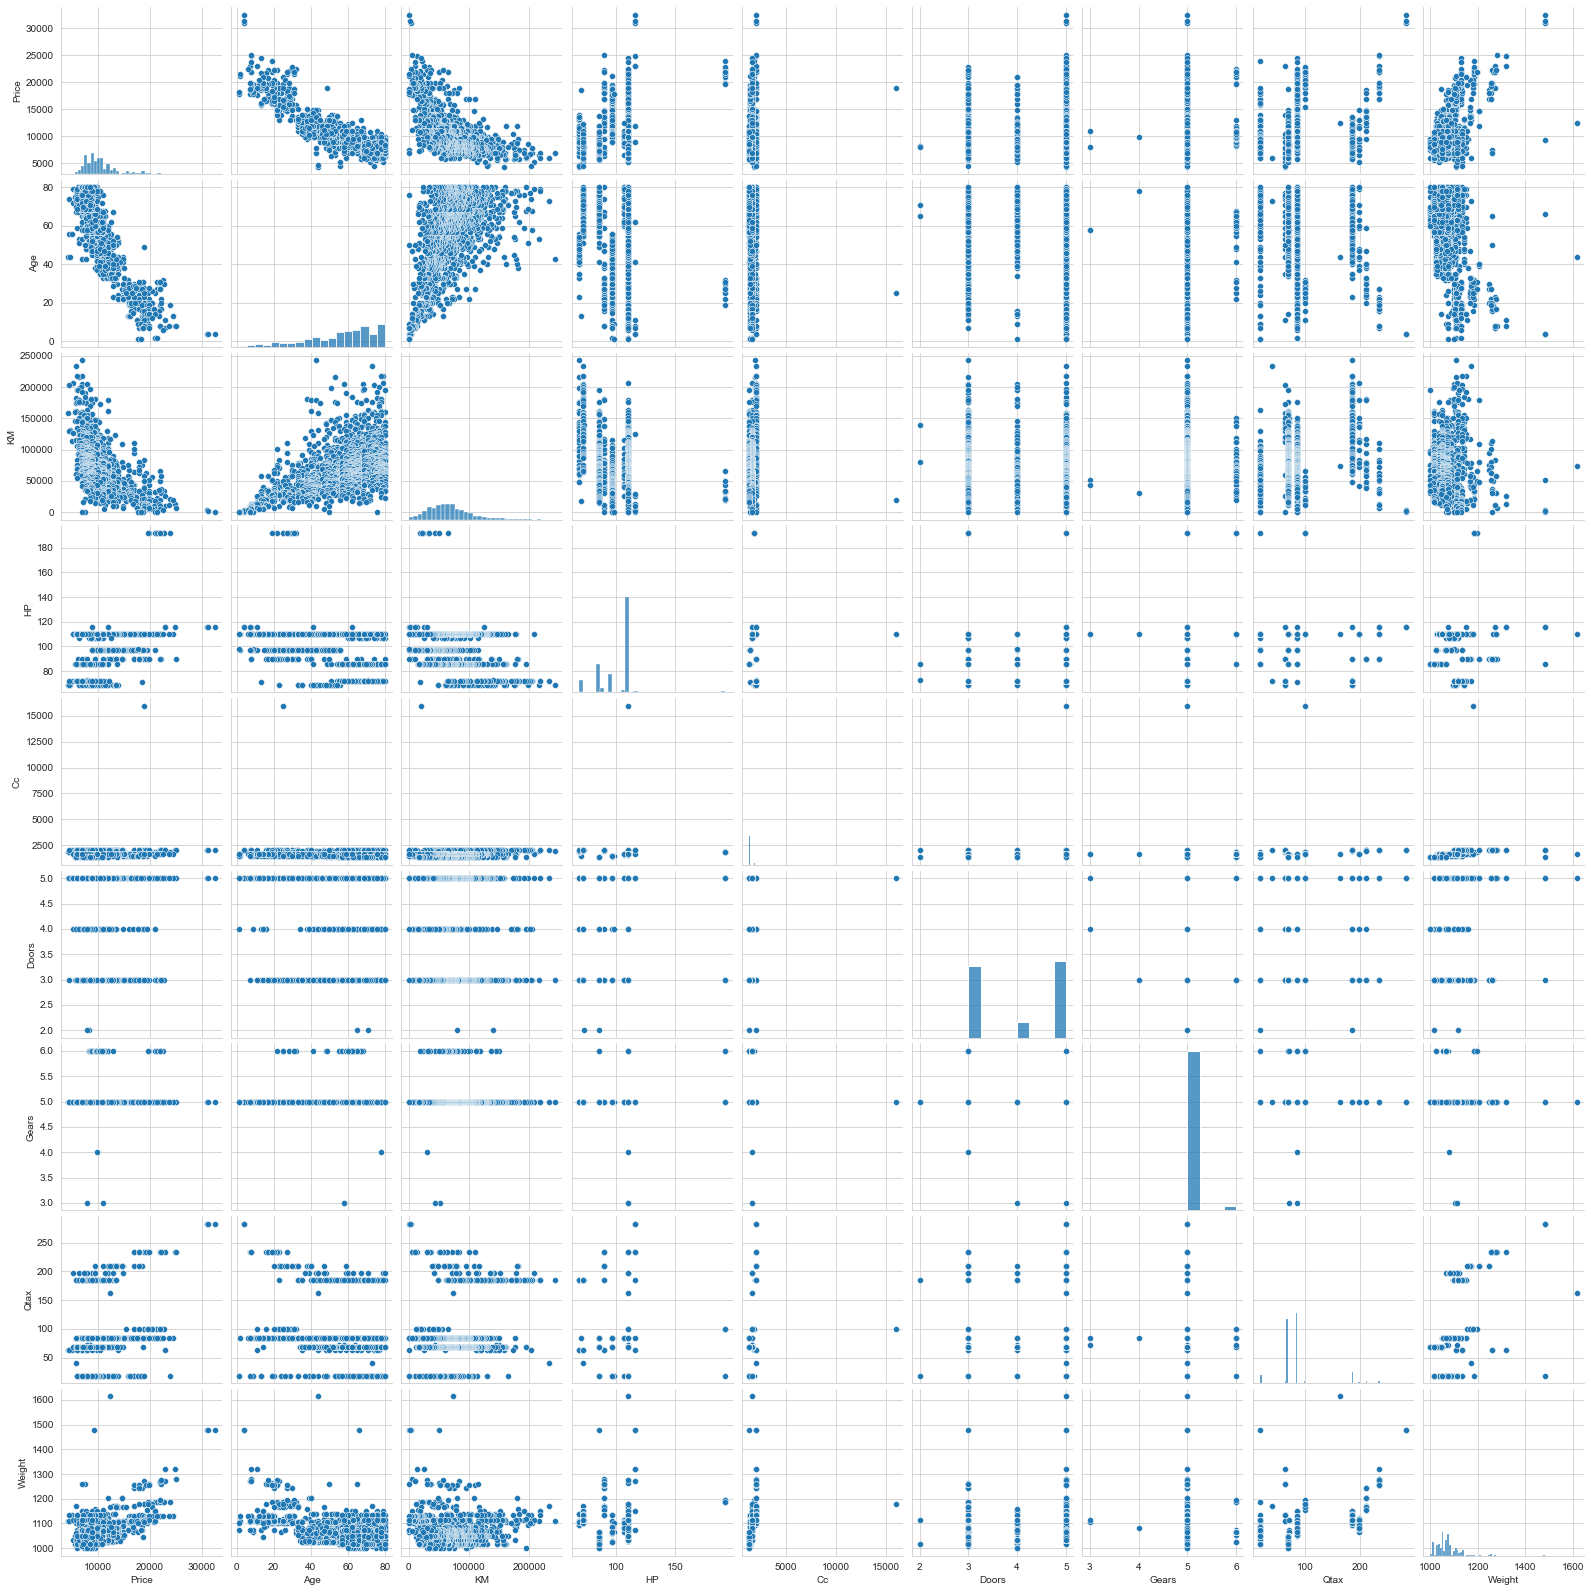

In [54]:
sns.set_style(style='whitegrid')
sns.pairplot(toyota2)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
# standardizing data
scale = StandardScaler()
toyota_scale = scale.fit_transform(toyota)
toyota_scale

array([[ 0.76376268, -1.77196633, -0.57469494, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.83271485, -1.77196633,  0.11745379, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.88787659, -1.71818412, -0.71538641, ..., -0.14042519,
         2.98867967,  1.75856113],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-0.96004167,  0.75579727, -1.37670303, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-1.04278428,  1.0784905 , -1.82784925, ..., -0.14042519,
        -1.65690726,  0.78939926]])

In [57]:
toyota3=pd.DataFrame(toyota_scale,columns=['Price','Age','KM','HP','Cc','Doors','Gears','Qtax','Weight'])
toyota3

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [58]:
# build model
model = smf.ols('Price~Age+KM+HP+Cc+Doors+Gears+Qtax+Weight',data=toyota2).fit()
model

In [59]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
Cc             -0.118558
Doors          -0.920189
Gears         597.715894
Qtax            3.858805
Weight         16.855470
dtype: float64

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:11:21   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
Cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Qtax           3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

Cc & doors are insignificant as per pvalues

In [62]:
ml_C_vol=smf.ols('Price ~ Cc',data = toyota2).fit()
# Cc has significant pvalue
print(ml_C_vol.tvalues, '\n', ml_C_vol.pvalues)

Intercept    24.879592
Cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
Cc            2.292856e-06
dtype: float64


In [63]:
# Cc is significant when taken independently
ml_C_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           2.29e-06
Time:                        17:11:21   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
Cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
ml_D_vol=smf.ols('Price ~ Doors',data = toyota2).fit()
# doors has significant pvalue
print(ml_C_vol.tvalues, '\n', ml_C_vol.pvalues) 

Intercept    24.879592
Cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
Cc            2.292856e-06
dtype: float64


In [65]:
# doors is significant when taken independently
ml_D_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           2.40e-12
Time:                        17:11:21   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# varaibles have significant pvalues
ml_C_D=smf.ols('Price~Cc+Doors',data = toyota2).fit()  
print(ml_C_D.tvalues, '\n', ml_C_D.pvalues)  

Intercept    12.786341
Cc            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
Cc           2.101878e-05
Doors        2.109558e-11
dtype: float64


In [67]:
# collinearity check
rsq_Age = smf.ols('Age ~ KM+HP+Cc+Doors+Gears+Qtax+Weight',data=toyota2).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM ~ Age+HP+Cc+Doors+Gears+Qtax+Weight',data=toyota2).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP ~ KM+Age+Cc+Doors+Gears+Qtax+Weight',data=toyota2).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_Cc = smf.ols('Cc ~ KM+HP+Age+Doors+Gears+Qtax+Weight',data=toyota2).fit().rsquared
vif_Cc = 1/(1-rsq_Cc)

rsq_D = smf.ols('Doors ~ KM+HP+Cc+Age+Gears+Qtax+Weight',data=toyota2).fit().rsquared
vif_D = 1/(1-rsq_D)

rsq_G = smf.ols('Gears ~ KM+HP+Cc+Doors+Age+Qtax+Weight',data=toyota2).fit().rsquared
vif_G = 1/(1-rsq_G)

rsq_QT = smf.ols('Qtax ~ KM+HP+Cc+Doors+Gears+Age+Weight',data=toyota2).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_W = smf.ols('Weight ~ KM+HP+Cc+Doors+Gears+Qtax+Age',data=toyota2).fit().rsquared
vif_W = 1/(1-rsq_W)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','Cc', 'Doors', 'Gears', 'Qtax', 'Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_Cc, vif_D, vif_G, vif_QT,vif_W]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,Cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Qtax,2.295375
7,Weight,2.487180


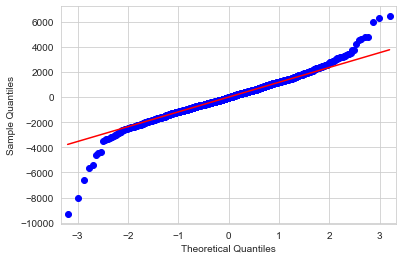

In [68]:
# residual analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
qqplot=sm.qqplot(model.resid,line='q')
plt.show()

In [69]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [70]:
list(np.where(model.resid < -6000))

[array([220, 600, 959], dtype=int64)]

In [71]:
# test for homoscedasticity or heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
# user defined z = (x - mu)/sigma
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

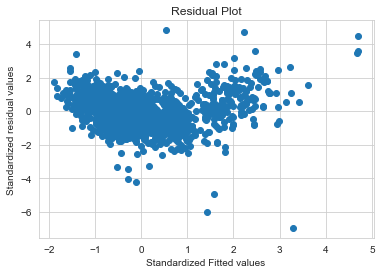

In [72]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Test for Errors (Residual Vs Regressors)

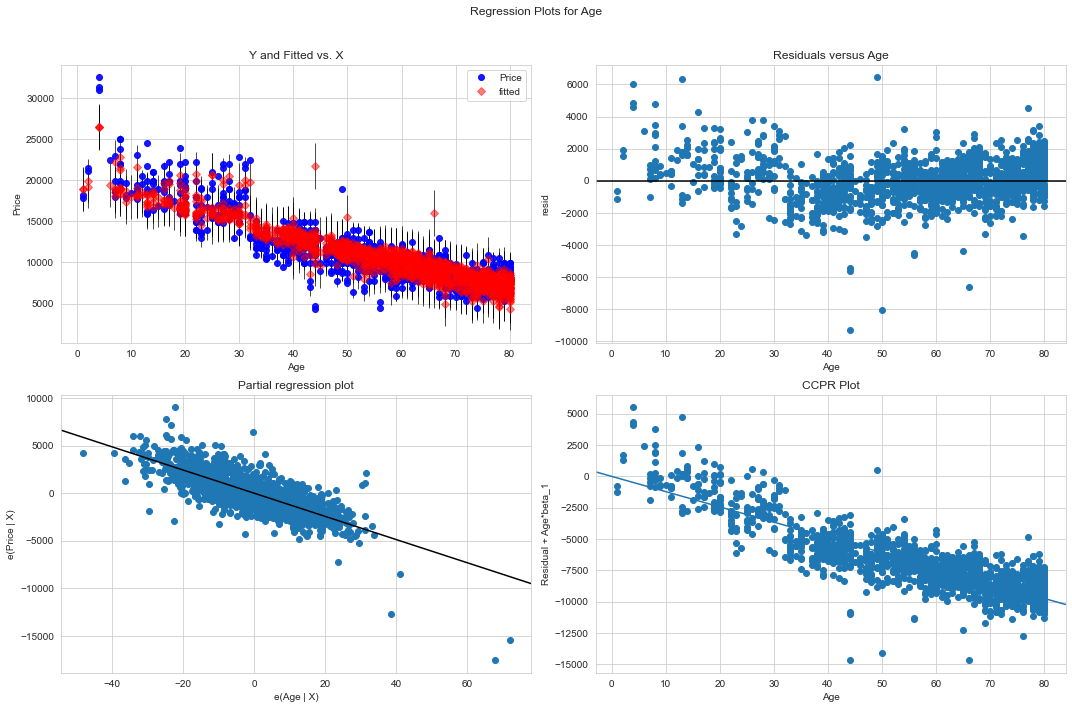

In [73]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

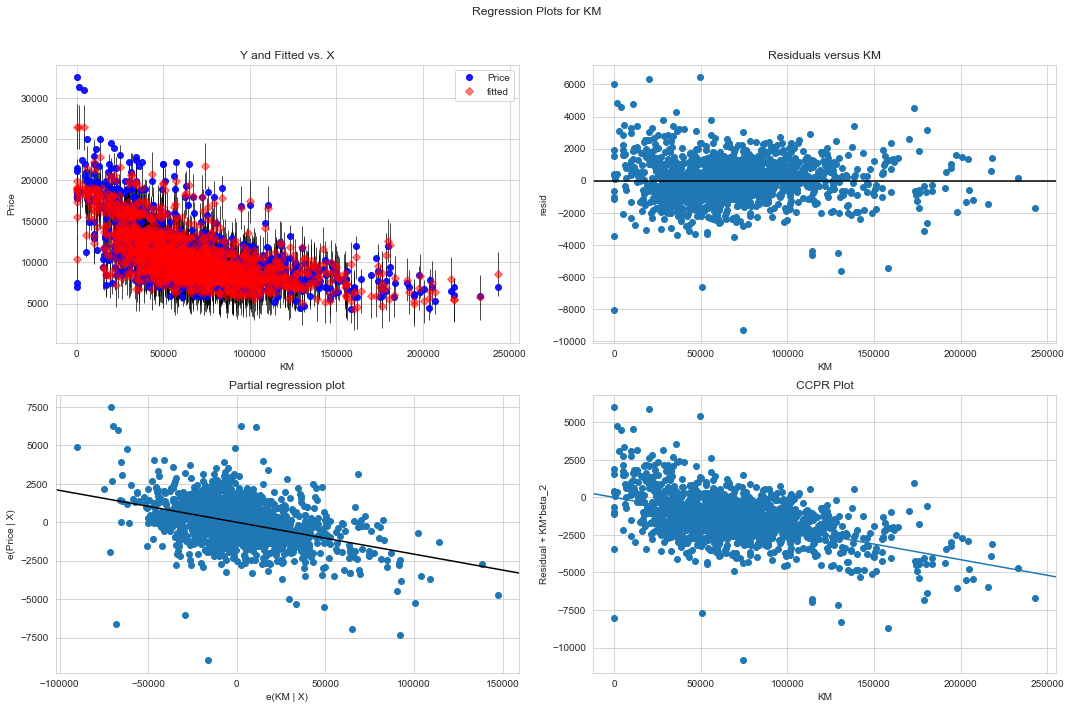

In [74]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

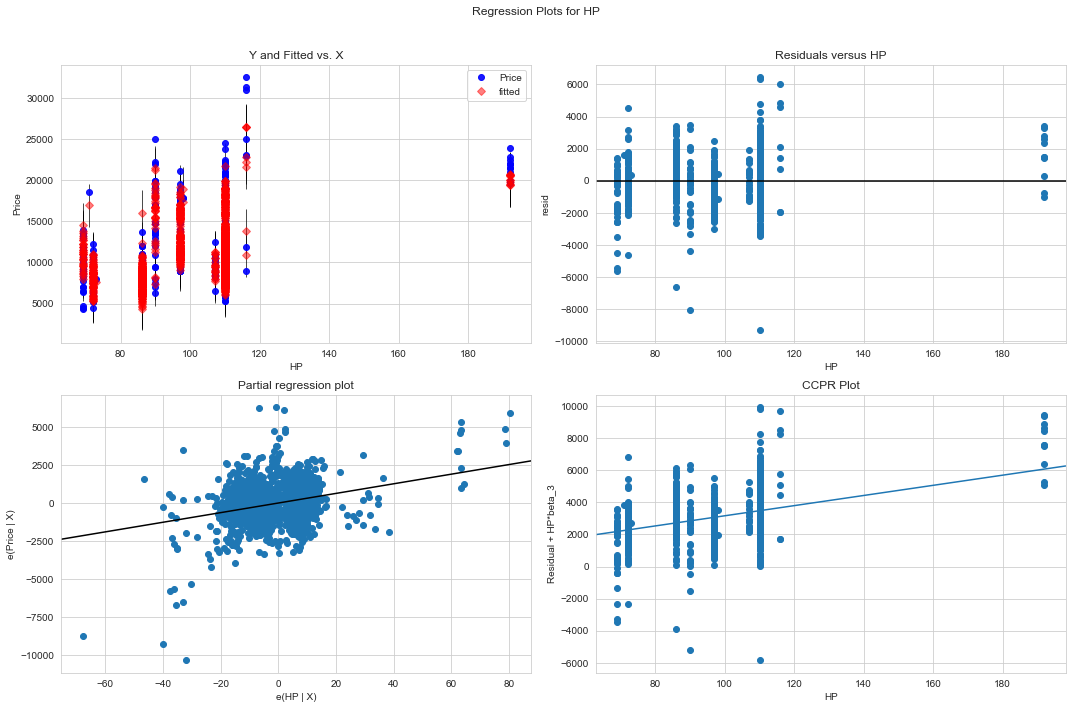

In [75]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

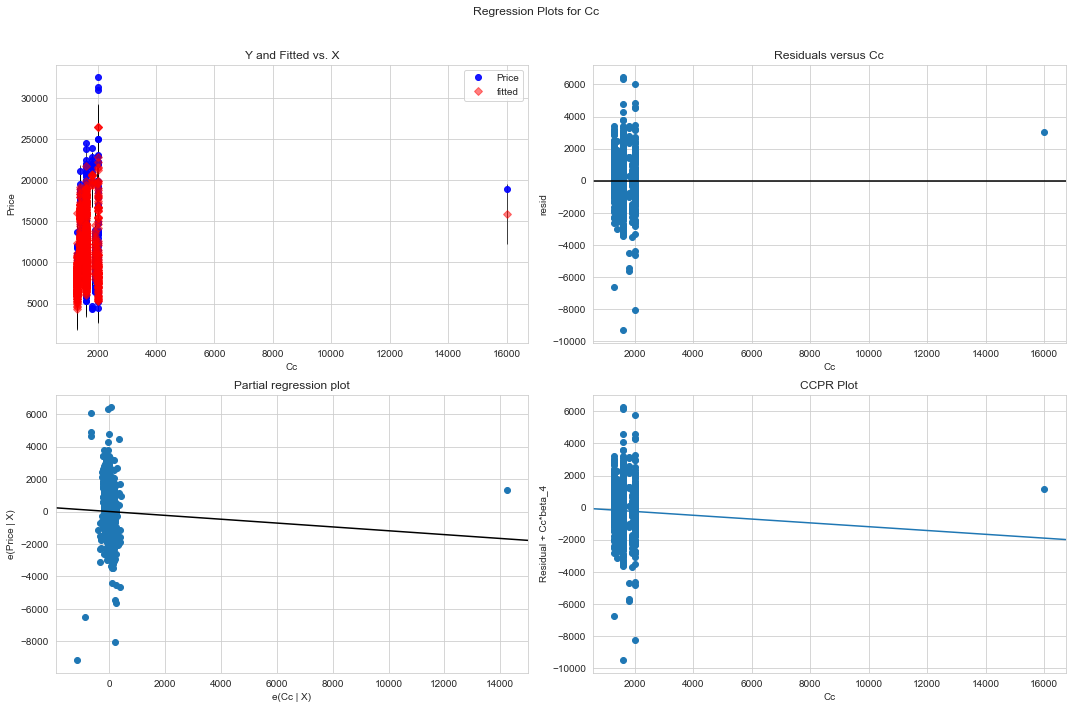

In [76]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Cc", fig=fig)
plt.show()

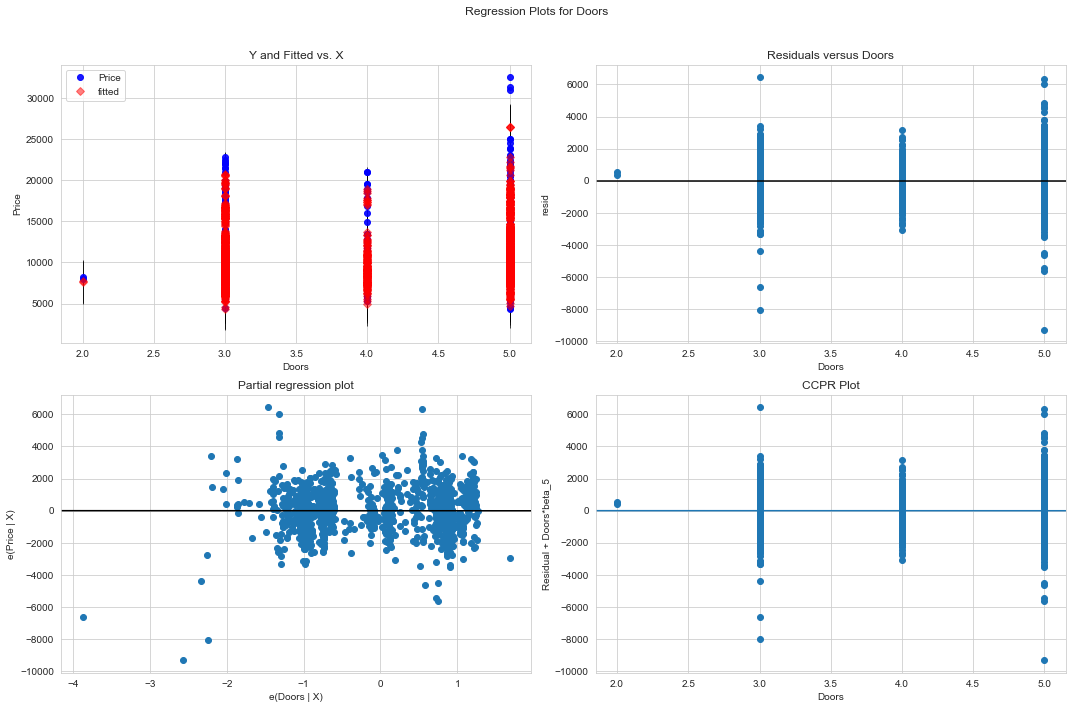

In [77]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

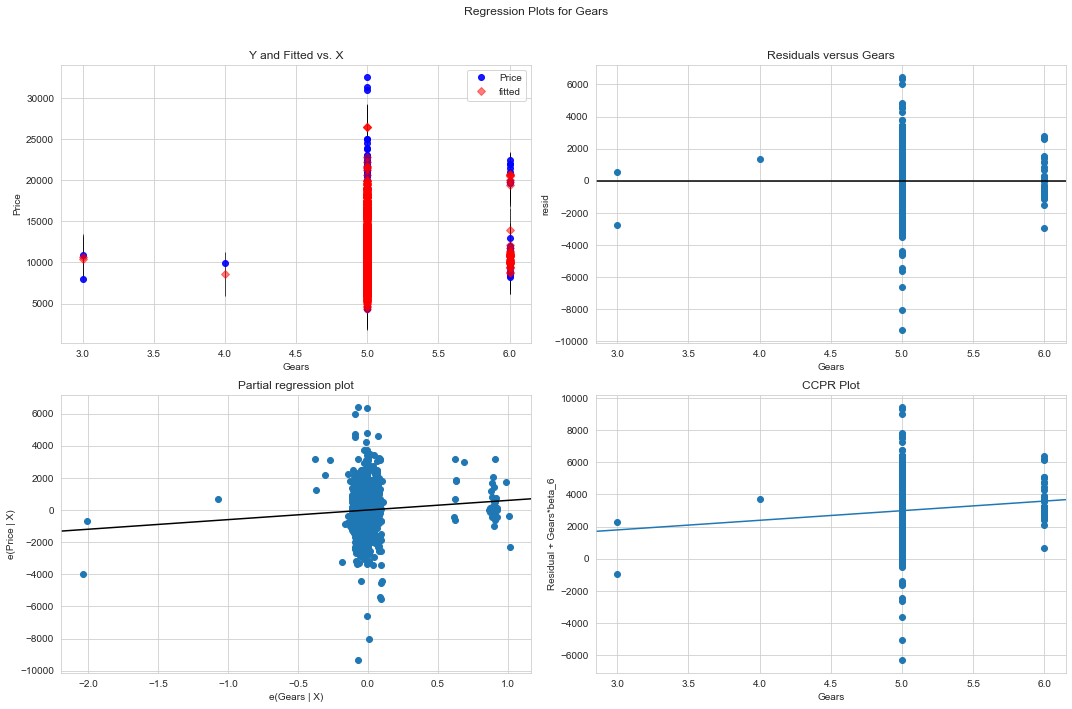

In [78]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

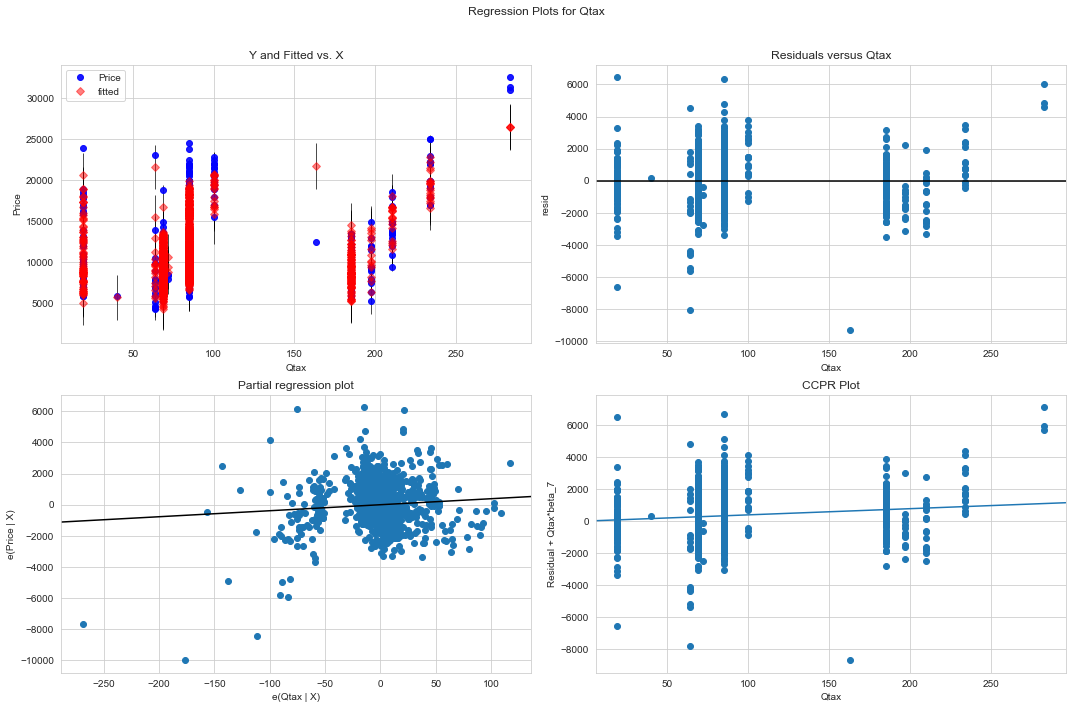

In [79]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Qtax", fig=fig)
plt.show()

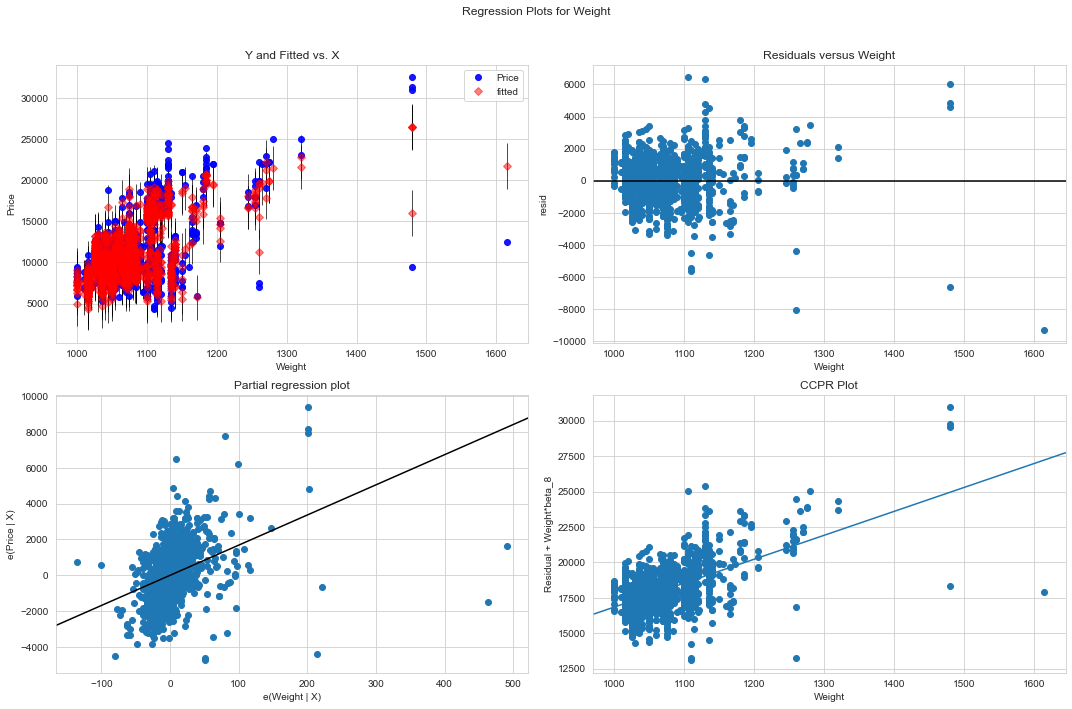

In [80]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

Model Deletion Diagnostics (checking Outliers or Influencers)

Two Techniques : 1. Cook's Distance & 2. Leverage value

In [81]:
# get influencers drived from our model i.e "model"
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

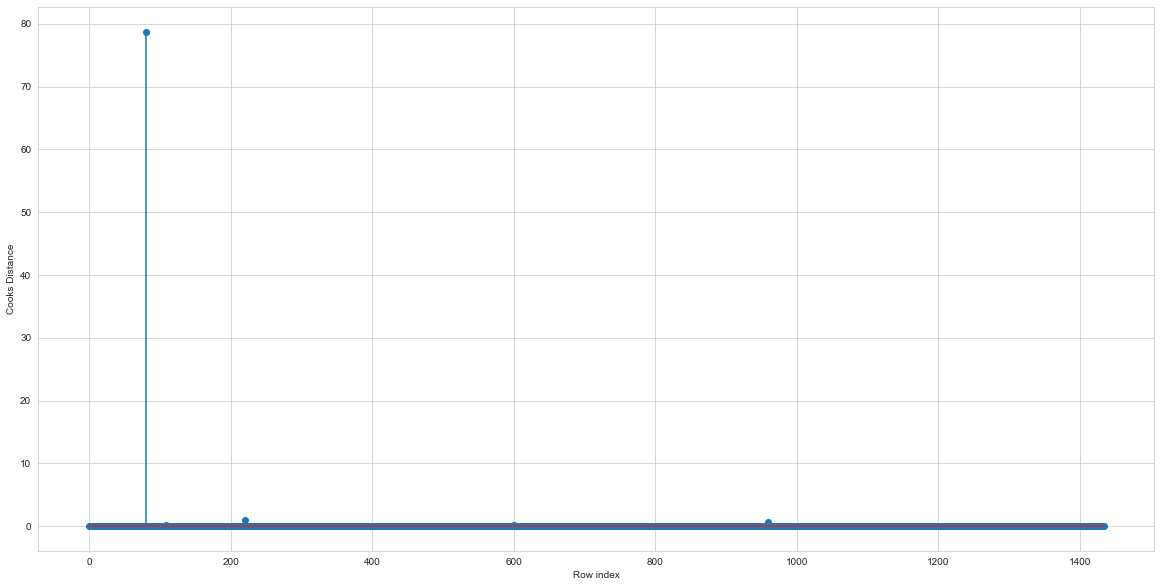

In [82]:
# plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(toyota2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

From the above plot, it is evident that data point 80 is the influencer

In [83]:
#index and value of influencer where c is more than 1
(np.argmax(c),np.max(c))

(80, 78.72950582248232)

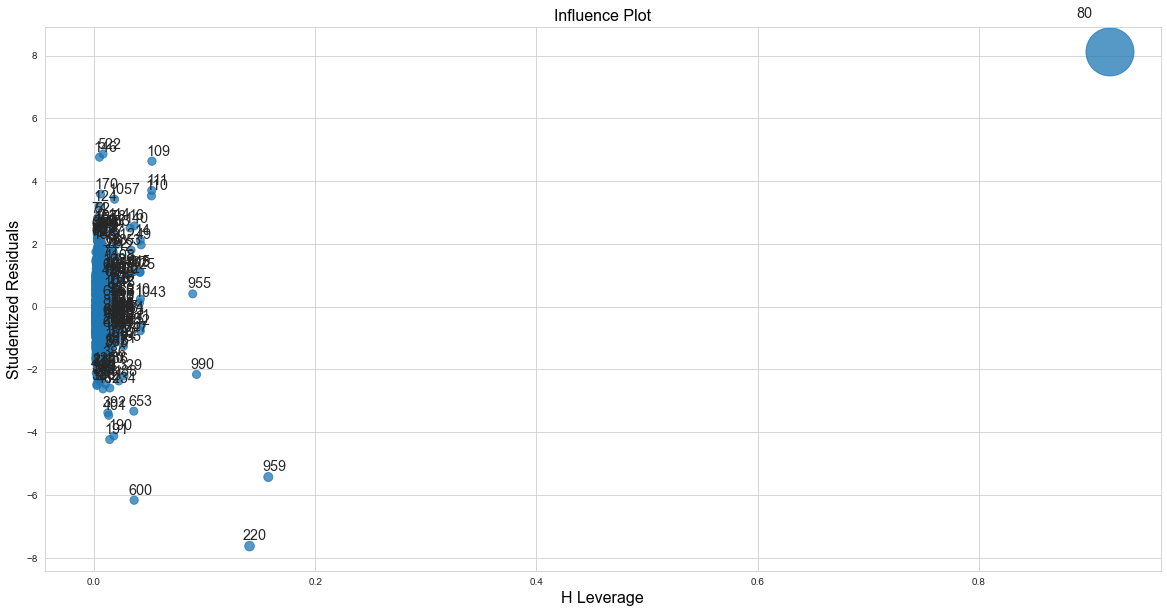

In [84]:
# leverage value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax = plt.subplots(figsize=(20,10))
influence_plot(model, ax= ax)
plt.show()

In [85]:
k = toyota2.shape[1] # K is no. of columns
n = toyota2.shape[0] # n is no. of rows
print(k, n)
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff) 

9 1435
0.020905923344947737


In [86]:
toyota2[toyota2.index.isin([80])]

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [87]:
# see the differences in HP, Doors and other variable values
toyota2.head(10)

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [88]:
# improving the model
# discard the data points which are influencers and reasign the row number (reset_index())
toyota4=toyota2
toyota4=toyota4.drop(toyota4.index[[80]],axis=0).reset_index()
toyota4

,index,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


In [89]:
# drop the original index
toyota4=toyota4.drop(['index'],axis=1)
toyota4

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [90]:
model1=smf.ols('Price~Age+KM+HP+Cc+Doors+Gears+Qtax+Weight',data=toyota4).fit()
model1

In [91]:
(model1.rsquared,model1.aic)

(0.8681163912634053, 24669.363894157)

Comparing above R-Square and AIC values with original model, we can conclude that accuracy of model1 is high as compared to initial model named model

In [92]:
model1_influence = model1.get_influence() # get_influence() drived from our model i.e 'model1"
(c1, _) = model1_influence.cooks_distance  # Cook’s Distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

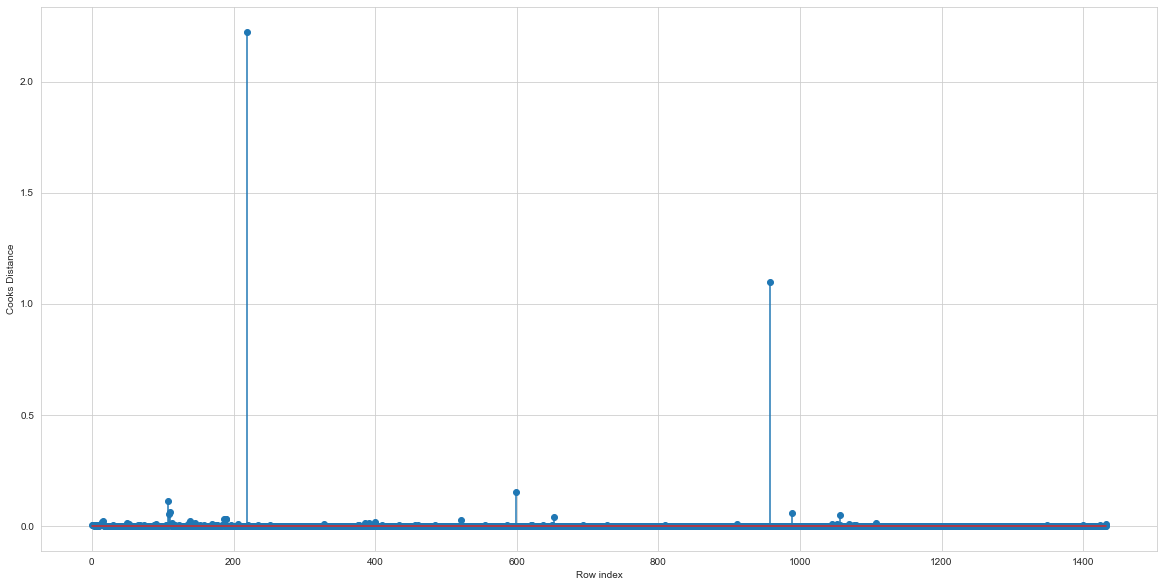

In [93]:
fig= plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(toyota4)),np.round(c1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

From the above plot, it is evident that data point 219 is the influencer

In [94]:
#index of the data points where c is more than 1
(np.argmax(c1),np.max(c1))

(219, 2.225351365527139)

In [95]:
toyota4[toyota4.index.isin([219])]

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
219,12450,44,74172,110,1600,5,5,163,1615


In [96]:
# drop 219th observation
# 219th observation is outlier having value more than 1
toyota5 = toyota4
toyota5=toyota5.drop(toyota5.index[[219]],axis=0) 
toyota5

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [97]:
# build the rebuild model on the new data
model2 = smf.ols('Price~Age+KM+HP+Cc+Doors+Gears+Qtax+Weight',data=toyota5).fit()
(model2.rsquared,model2.aic)

(0.8765926307402282, 24557.748263908954)

In [98]:
#Again check for influencers (Cook's Distance)
(c2, _) = model2.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

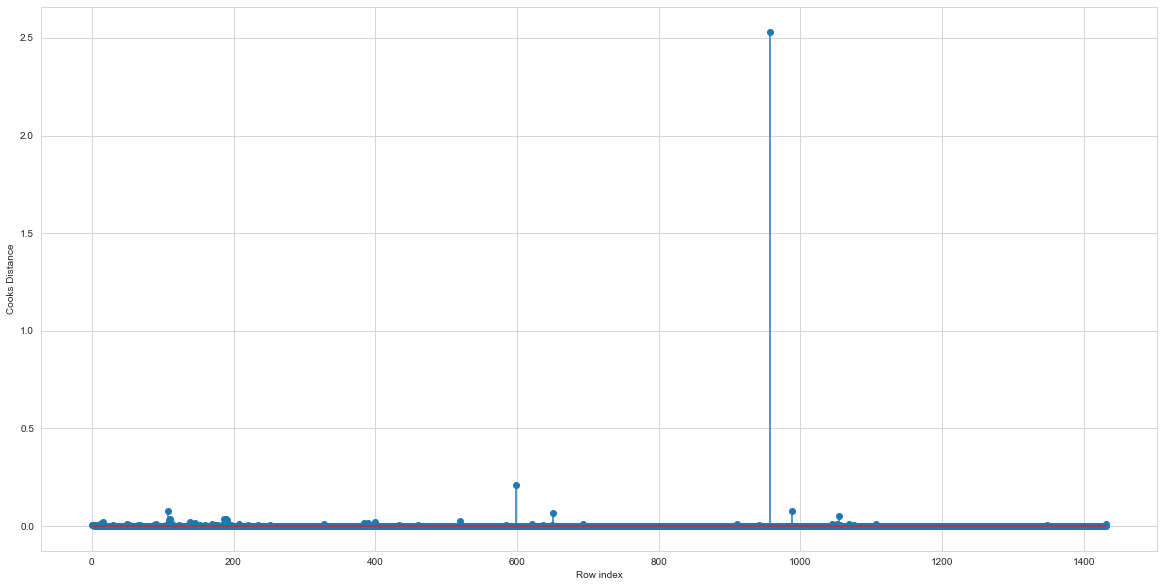

In [99]:
fig= plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(toyota5)),np.round(c2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

From the above plot, it is evident that data point 957 is the influencer

In [100]:
#index of the data points where c is more than 1
(np.argmax(c2),np.max(c2))

(957, 2.5307796232766333)

In [101]:
toyota5[toyota5.index.isin([957])]

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
957,8895,61,50925,110,1600,5,5,85,1070


In [102]:
# drop 957th observation
# 957th observation is outlier having cook's distance more than 1
toyota6=toyota5
toyota6=toyota6.drop(toyota6.index[[957]],axis=0) 
toyota6

,Price,Age,KM,HP,Cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [112]:
#Build the model on the new data
model3=smf.ols('Price~Age+KM+HP+Cc+Doors+Gears+Qtax+Weight',data=toyota6).fit()
(model3.rsquared,model3.aic)

(0.8839684606741538, 24453.23573612724)

In [113]:
#Again check for influencers (Cook's Distance)
(c3, _) = model3.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

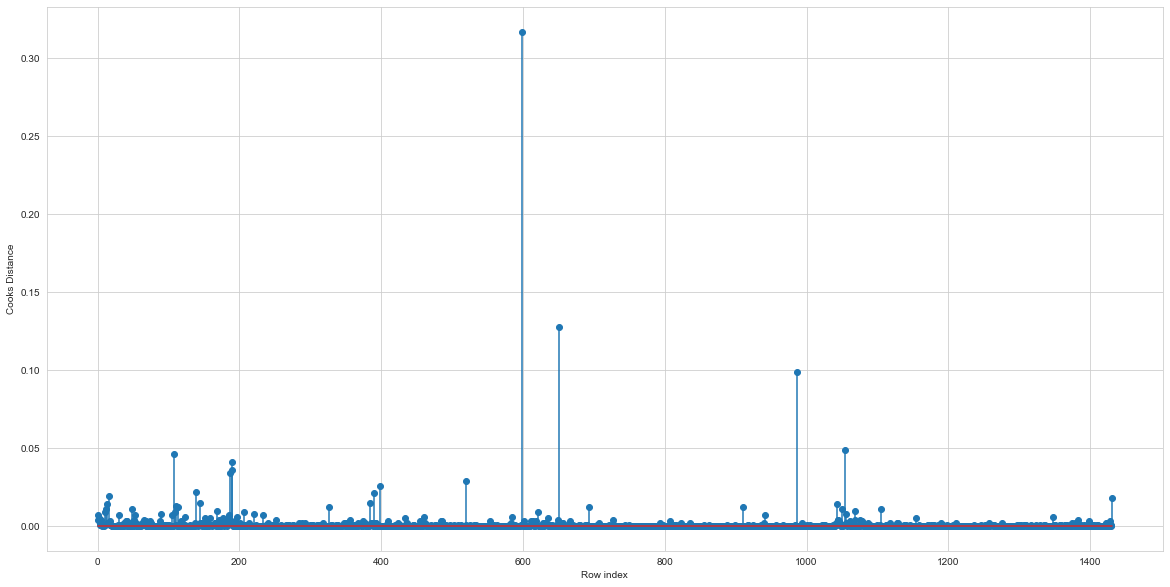

In [114]:
fig= plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(toyota6)),np.round(c3,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [115]:
# Since cook's distance is < 1, therefore we stop the model deletion
(np.argmax(c3),np.max(c3))

(598, 0.3168903540145268)

**Since cook's distance = 0.3168903540145268 which is < 1, therefore we stop the model deletion and finalize the model**

model3 is our final model with
rsquare = 0.8839684606741538, aic=24453.23573612724)

**Thus the model accuracy improved to 88.396 %**

In [125]:
# let the data for prediction is
pred_data=pd.DataFrame({'Age':6,"KM":40000,"HP":80,"Cylinder_vol":1800, "Doors":4,"Gears":5,"Q_tax": 350, "Weight":1304},index=[0])
pred_data

,Age,KM,HP,Cylinder_vol,Doors,Gears,Q_tax,Weight
0,6,40000,80,1800,4,5,350,1304


In [129]:
# prediction for original data with 88% accuracy
pred_price = model3.predict(toyota6)
pred_price

0       16326.634426
1       15886.220972
2       16304.093367
3       15973.237208
4       15839.043084
            ...     
1429     9114.821644
1430     8499.169594
1431     8644.902871
1432     8758.662855
1433    10638.570082
Length: 1432, dtype: float64